# Outliers

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use("dark_background")

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
data=sns.load_dataset("mpg")
data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
data.isnull().mean()*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


# OUTLIER TREATMENT

# Boxplot

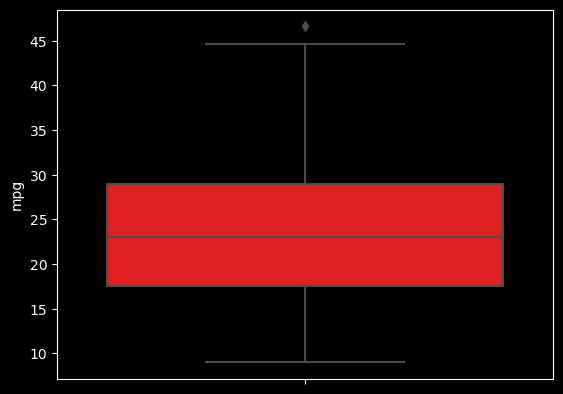

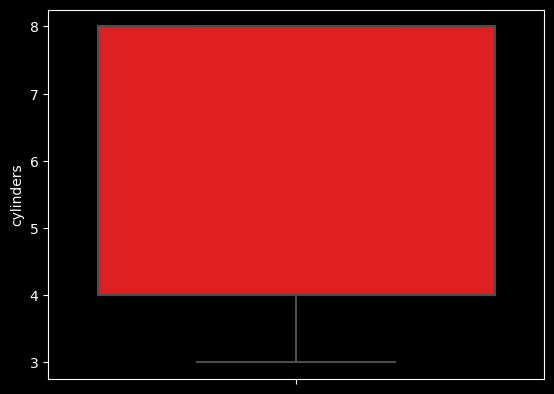

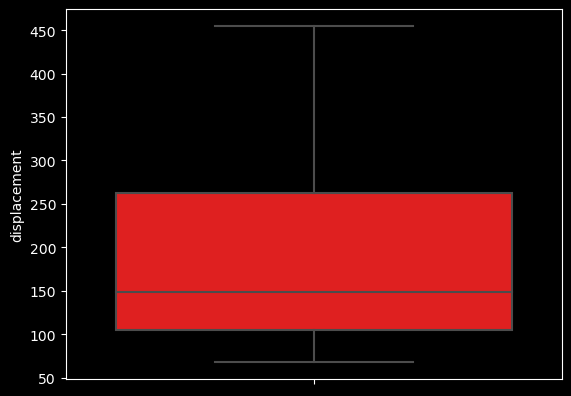

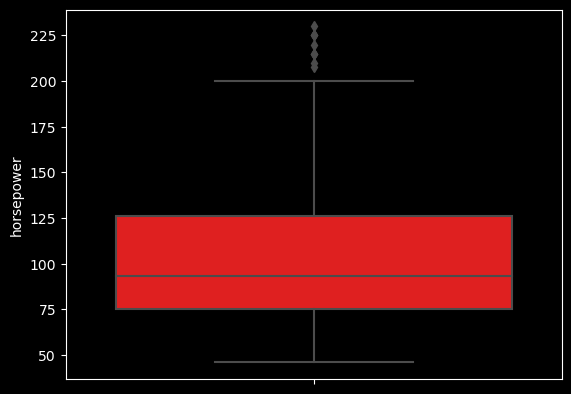

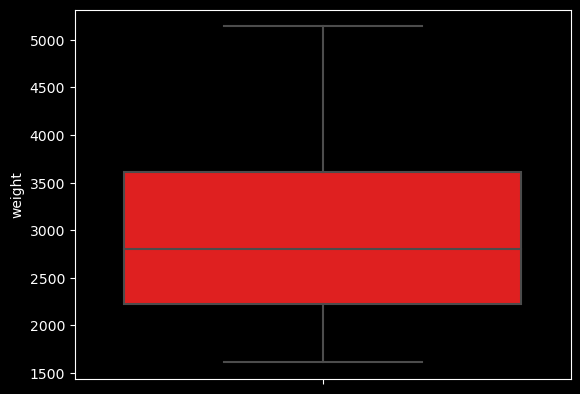

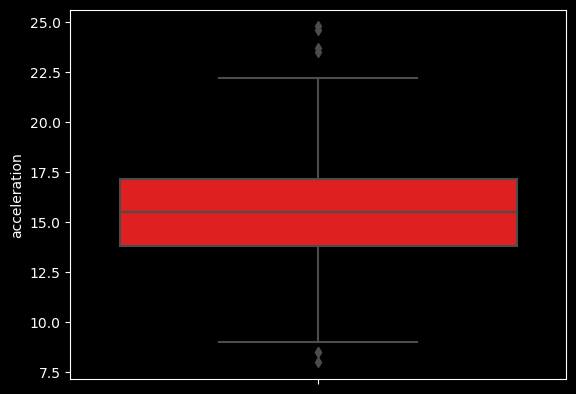

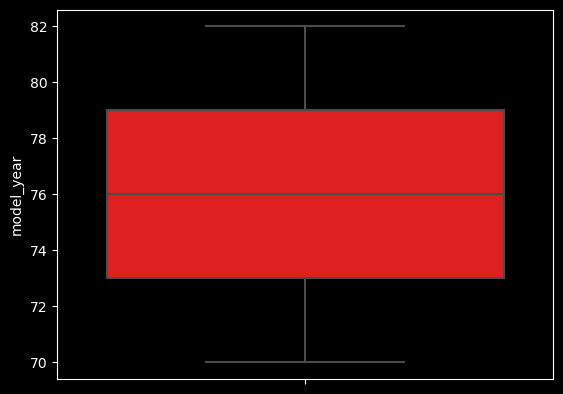

In [6]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i],color="red")
        plt.show()
        

# Setting outlier limit


In [7]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [10]:
for colmn in data.columns:
    if data[colmn].dtype!="object":
        UL,LL=outlier_limit(data[colmn])
        data[colmn]=np.where((data[colmn]>UL)|(data[colmn]<LL),np.nan,data[colmn])

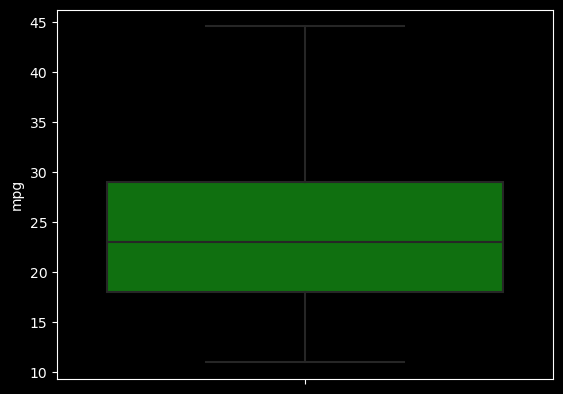

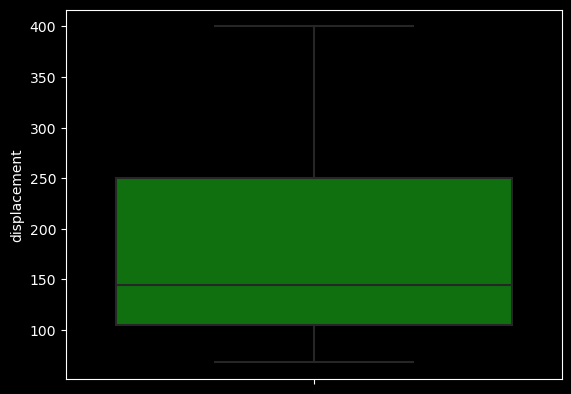

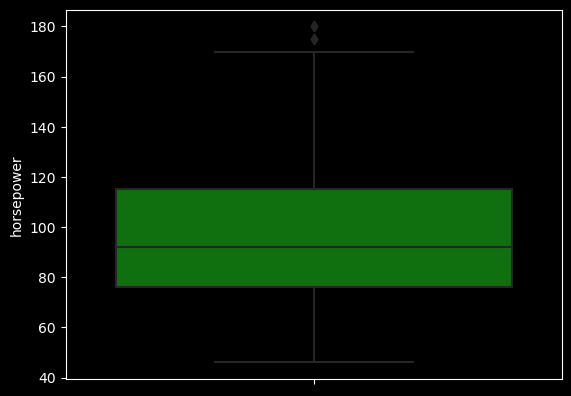

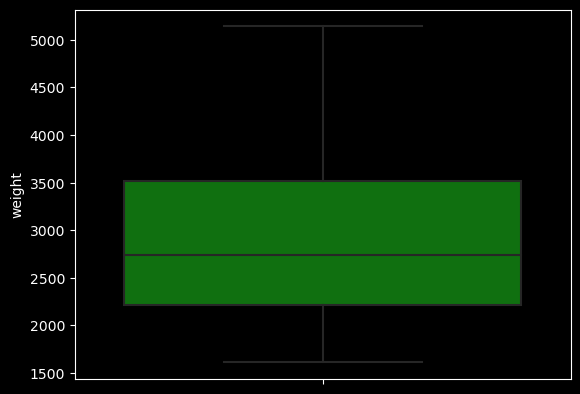

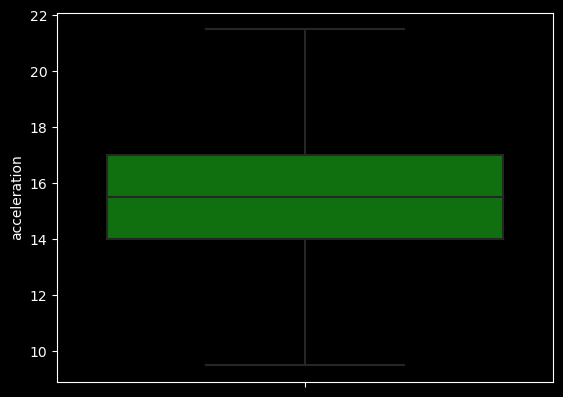

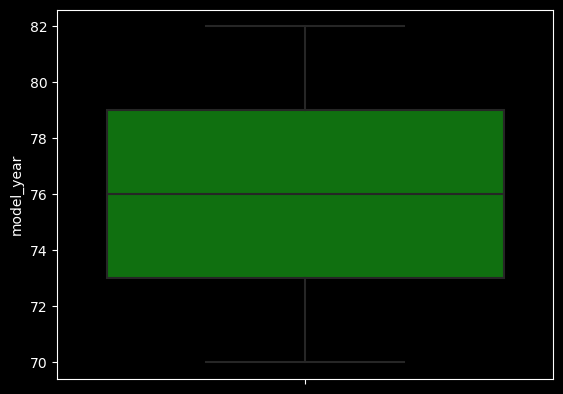

In [22]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i],color="green")
        plt.show();

In [12]:
data.isnull().sum()

mpg              1
cylinders        0
displacement     0
horsepower      23
weight           0
acceleration    14
model_year       0
origin           0
name             0
dtype: int64

In [13]:
data.shape

(398, 9)

In [14]:
data.isnull().mean()*100

mpg             0.251256
cylinders       0.000000
displacement    0.000000
horsepower      5.778894
weight          0.000000
acceleration    3.517588
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

In [15]:
data.dropna(inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           363 non-null    float64
 1   cylinders     363 non-null    float64
 2   displacement  363 non-null    float64
 3   horsepower    363 non-null    float64
 4   weight        363 non-null    float64
 5   acceleration  363 non-null    float64
 6   model_year    363 non-null    float64
 7   origin        363 non-null    object 
 8   name          363 non-null    object 
dtypes: float64(7), object(2)
memory usage: 28.4+ KB


In [18]:
data.cylinders.unique()

array([8., 4., 6., 3., 5.])

In [19]:
dict1={8:"eight",4:"four",3:"three",6:"six",5:"five"}
data["cylinders"]=data["cylinders"].map(dict1)

In [20]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,eight,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet chevelle malibu
1,15.0,eight,350.0,165.0,3693.0,11.5,70.0,usa,buick skylark 320
2,18.0,eight,318.0,150.0,3436.0,11.0,70.0,usa,plymouth satellite
3,16.0,eight,304.0,150.0,3433.0,12.0,70.0,usa,amc rebel sst
4,17.0,eight,302.0,140.0,3449.0,10.5,70.0,usa,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,four,151.0,90.0,2950.0,17.3,82.0,usa,chevrolet camaro
393,27.0,four,140.0,86.0,2790.0,15.6,82.0,usa,ford mustang gl
395,32.0,four,135.0,84.0,2295.0,11.6,82.0,usa,dodge rampage
396,28.0,four,120.0,79.0,2625.0,18.6,82.0,usa,ford ranger


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           363 non-null    float64
 1   cylinders     363 non-null    object 
 2   displacement  363 non-null    float64
 3   horsepower    363 non-null    float64
 4   weight        363 non-null    float64
 5   acceleration  363 non-null    float64
 6   model_year    363 non-null    float64
 7   origin        363 non-null    object 
 8   name          363 non-null    object 
dtypes: float64(6), object(3)
memory usage: 28.4+ KB


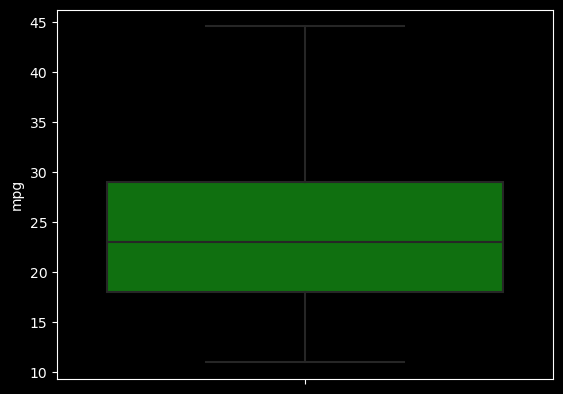

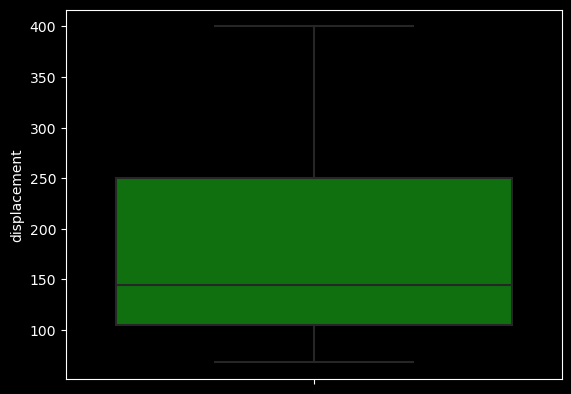

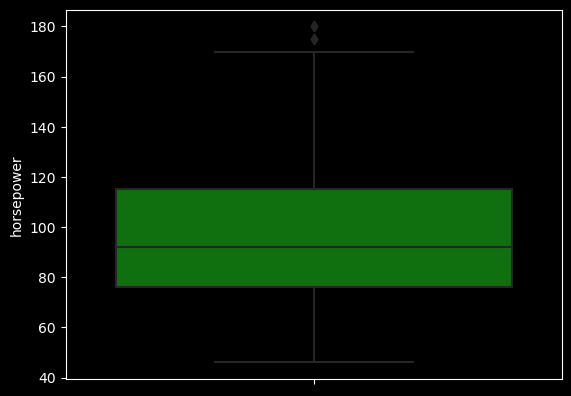

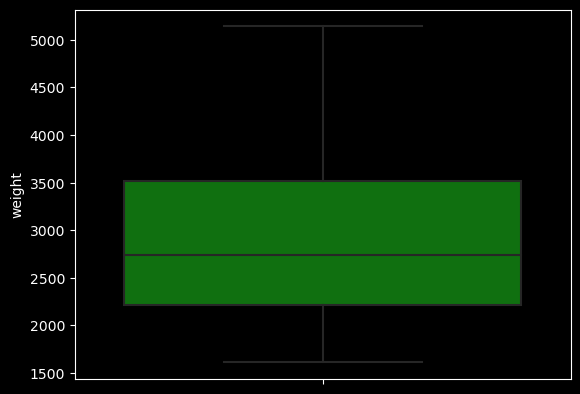

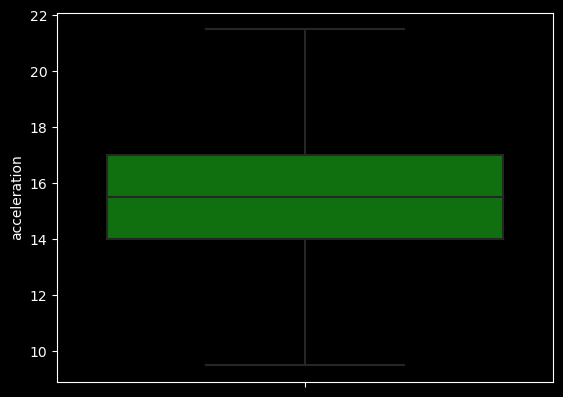

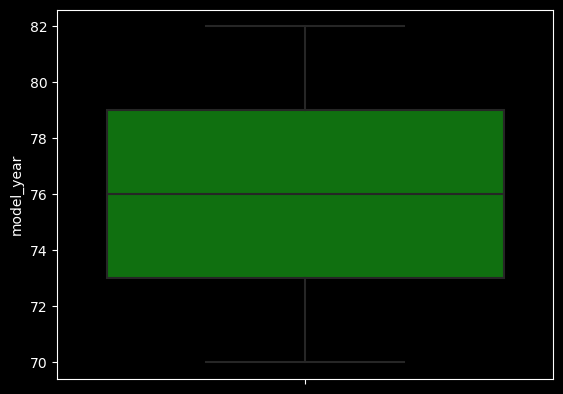

In [23]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i],color="green")
        plt.show();

In [26]:
data_cleaning_suggestions(data)

NameError: name 'data_cleaning_suggestions' is not defined

<AxesSubplot:>

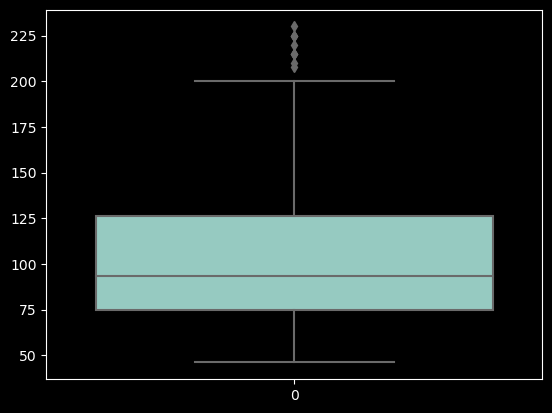

In [4]:
sns.boxplot(data=data["horsepower"])